<a href="https://colab.research.google.com/github/Harischandra359/ORES-CLEANED-DATASET/blob/main/Copy_of_week12_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [ ]:
%matplotlib inline
import pandas as pd
# Load the data
condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')

print("Original shape:", condemnations.shape)

condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])

condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

print("Filtered shape:", condemnations.shape)

Original shape: (32586, 40)
Filtered shape: (30232, 40)


<ipython-input-1-685bfa15a947>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')


In [ ]:
%matplotlib inline
import pandas as pd

# Load the data
condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')

print("Original shape:", condemnations.shape)

condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])

condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

print("Filtered shape:", condemnations.shape)


Original shape: (32586, 40)
Filtered shape: (30232, 40)


<ipython-input-11-e374f3a7b574>:5: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt')


In [ ]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [ ]:
import pandas as pd
import numpy as np


by_year = pd.pivot_table(condemnations,
                         values='AcctNum',  # Assuming 'AcctNum' is a column you want to count
                         index=condemnations['InspectDate'].dt.year,  # Extract year from InspectDate
                         columns='Status',
                         aggfunc=np.ma.count,  # Use np.ma.count as the aggregate function
                         fill_value=0)  # Fill missing values with 0

print(by_year)


Status          B    L   R    W
InspectDate                    
1986           22   12  19  112
1987           91   20   8  361
1988          215   16  15  297
1989          277   15  11  432
1990          119   29   8  322
1991          139   18   4  351
1992          204   30   4  258
1993          185   47   2  193
1994          208   94   5  293
1995          176  127   0  268
1996          214  171   0  794
1997          281  328   0  878
1998          254  343   0  599
1999          272  283   0  826
2000          320  268   0  529
2001          381  262   0  296
2002          383  227   0  317
2003          361  201   0  282
2004          354  204   0  381
2005          410  237   0  345
2006          479  233  20  370
2007          613  262   0  341
2008          700  254   0  334
2009          785  223   0  200
2010         1161  193   0  154
2011         1028  275   0  107
2012          738  257   1   28
2013          185  209   1    2
2014           17  128   0    0


In [ ]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='InspectDate'>

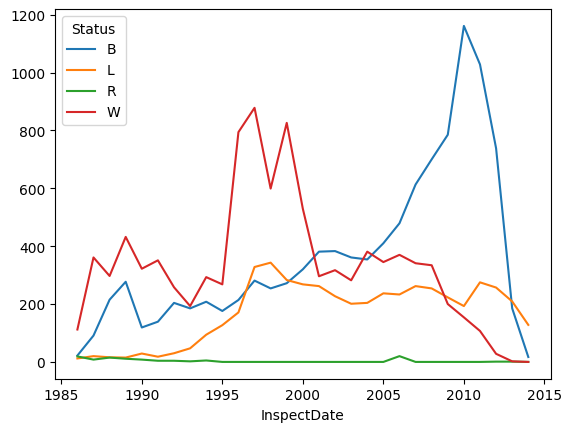

In [ ]:
%matplotlib inline
by_year.plot()

---

In the displayed data, the peak in 2010 for category 'B' suggests a significant increase in activity, showcasing a consistent upward trend over the entire time frame. Conversely, column 'R' hits its lowest point around 2012, indicating a period of relative inactivity, notably between 1994 and 2012. Columns 'W' and 'L' exhibit irregular patterns, lacking a clear trend. The visualization from 1985 to 2015 provides insights into temporal dynamics, making it a valuable tool for understanding condemnation patterns and prompting further investigation into influencing factors.







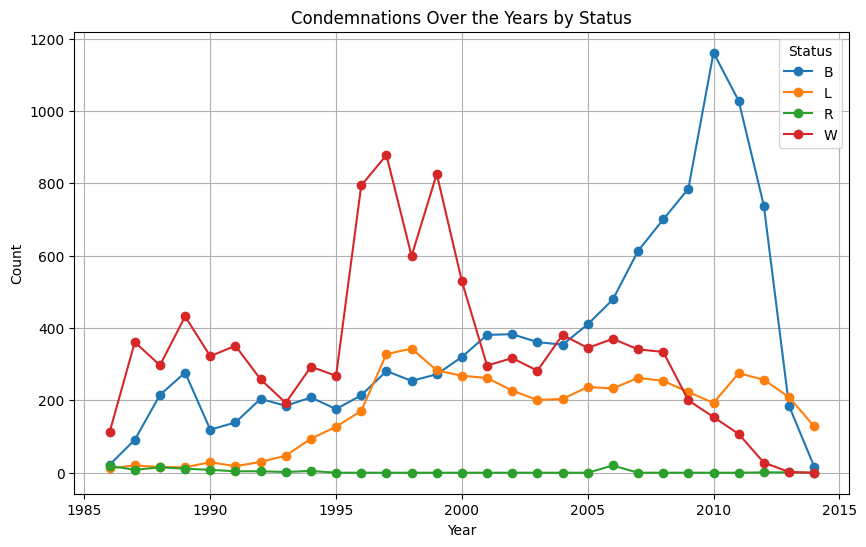

In [ ]:
import matplotlib.pyplot as plt

# Plotting multi-series line chart
by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Condemnations Over the Years by Status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Status')
plt.grid(True)
plt.show()


# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [ ]:
import pandas as pd
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')

meetings['startDate'] = meetings['startTime'].str[0:10]

meetings.loc[meetings['startDate'].between('2020-02-17', '2020-02-28'), 'WeekLabel'] = 'BEFORE'

meetings.loc[meetings['startDate'].between('2020-03-16', '2020-03-27'), 'WeekLabel'] = 'DURING'

summary = pd.pivot_table(meetings,
                         values='startTime',
                         index='userName',
                         columns='WeekLabel',
                         aggfunc='count',
                         fill_value=0)


In [ ]:
summary['pctChange'] = (summary['DURING'] - summary['BEFORE']) / summary['BEFORE']



---

In [ ]:
assert(len(summary) == 22)

In [ ]:
assert(summary['pctChange'].mean().round(2) == 0.92)

In [ ]:
import pandas as pd

# Load the data
meetings = pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')

# Create a new column for the day part of the startTime
meetings['startDate'] = meetings['startTime'].str[0:10]

# Create a column for the week label
meetings.loc[meetings['startDate'].between('2020-02-17', '2020-02-28'), 'WeekLabel'] = 'BEFORE'
meetings.loc[meetings['startDate'].between('2020-03-16', '2020-03-27'), 'WeekLabel'] = 'DURING'

# Create a summary pivot table
summary = pd.pivot_table(meetings,
                         values='startTime',
                         index='userName',
                         columns='WeekLabel',
                         aggfunc='count',
                         fill_value=0)

# Calculate the percent change column
summary['pctChange'] = (summary['DURING'] - summary['BEFORE']) / summary['BEFORE'] * 100




---



## Submitting Your Work

Submit as usual
